# Neural Networks with Tensorflow

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 22

np.random.seed(RANDOM_SEED)


In [2]:
(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_val.shape

(10000, 28, 28)

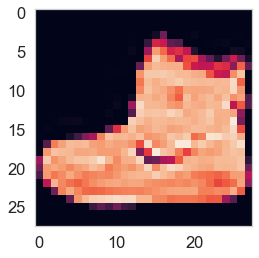

In [6]:
plt.imshow(x_train[0])
plt.grid(False)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

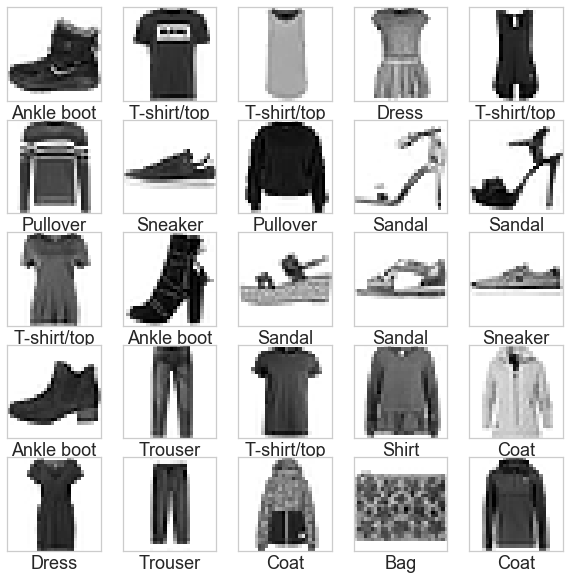

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [10]:
def preprocess(x, y):
    x = tf.cast(x, tf.float32) / 255.0
    y = tf.cast(y, tf.int64)

    return x, y

def create_dataset(xs, ys, n_classes=10):
    ys = tf.one_hot(ys, depth=n_classes)
    return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(128)

In [11]:
train_dataset = create_dataset(x_train, y_train)
val_dataset = create_dataset(x_val, y_val)

model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_dataset.repeat(), 
    epochs=10, 
    steps_per_epoch=500,
    validation_data=val_dataset.repeat(), 
    validation_steps=2
)

Train for 500 steps, validate for 2 steps
Epoch 1/10
500/500 [==============================] - 10s 20ms/step - loss: 1.6815 - accuracy: 0.7857 - val_loss: 1.6498 - val_accuracy: 0.8203
Epoch 2/10
500/500 [==============================] - 6s 12ms/step - loss: 1.6237 - accuracy: 0.8382 - val_loss: 1.6043 - val_accuracy: 0.8516
Epoch 3/10
500/500 [==============================] - 6s 12ms/step - loss: 1.6096 - accuracy: 0.8514 - val_loss: 1.6597 - val_accuracy: 0.7969
Epoch 4/10
500/500 [==============================] - 6s 11ms/step - loss: 1.6070 - accuracy: 0.8539 - val_loss: 1.5949 - val_accuracy: 0.8672
Epoch 5/10
500/500 [==============================] - 6s 13ms/step - loss: 1.6015 - accuracy: 0.8592 - val_loss: 1.6252 - val_accuracy: 0.8359
Epoch 6/10
500/500 [==============================] - 7s 15ms/step - loss: 1.5999 - accuracy: 0.8611 - val_loss: 1.5945 - val_accuracy: 0.8711
Epoch 7/10
500/500 [==============================] - 7s 14ms/step - loss: 1.5924 - accuracy: 0.868

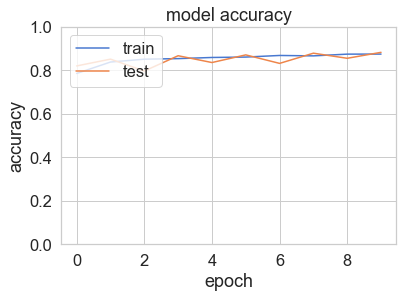

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1)) # Uncomment this when showing you model for pay raise
plt.legend(['train', 'test'], loc='upper left');

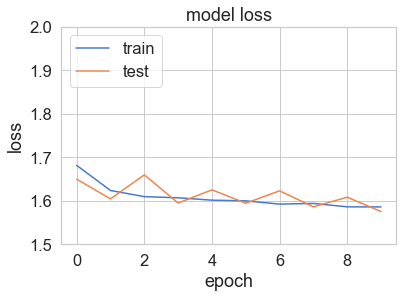

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((1.5, 2))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
predictions = model.predict(val_dataset)


In [15]:
predictions[0]

array([8.9190886e-16, 8.2655271e-14, 1.0000000e+00, 1.9296158e-17,
       2.4633572e-12, 2.8357026e-15, 4.6755303e-16, 1.5926931e-17,
       4.2921328e-14, 1.8415716e-21], dtype=float32)

In [16]:
np.argmax(predictions[0])

2

In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

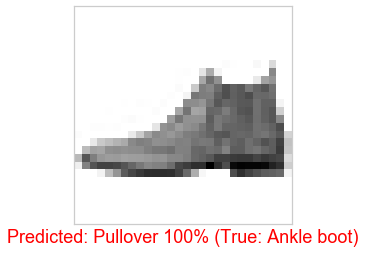

In [21]:
i = 0
plot_image(i, predictions, y_val, x_val)